# Week 5 - Exercises

## Exercise 1 - RMS Titanic

On April 15, 1912, during her maiden voyage from Southampton to New York, the four-funnelled ocean liner *RMS Titanic* hit an iceberg and sank to the bottom of the ocean in what is now one of the most infamous maritime disasters in history. For aesthetic reasons, and because the ship was widely considered unsinkable, many lifeboats were removed before the launch. This unfortunate decision contributed to the death of 1502 out of 2224 passengers and crew. 

The [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/) maintain a database of the names of passengers on the Titanic, which includes other information such as age, sex, and whether the passenger survived. A subset of these data are available freely through [Kaggle](https://www.kaggle.com/), an online data repository that also hosts regular data science competitions. Extensive analyses of the Titanic data set have shown that, while luck played its part, some groups of passengers did appear to have a better chance of surviving than others. 

The Titanic passenger dataset from Kaggle can be found in the `data` folder of the course materials, with the name `titanic.csv`. Let's use `pandas` to interrogate it!

Here is the key to the data:

| Variable   | Definition                                       | Key                                            |
|:-----------|:-------------------------------------------------|:-----------------------------------------------|
| PassengerID| Unique numeric identifier for the passenger      | NA                                             |
| Survival   | Survival                                         | 0 = No, 1 = Yes                                |
| Pclass     | Ticket class                                     | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex        | Sex                                              | NA                                             |
| Age        | Age in years                                     | NA                                             |
| SibSp      | Number of siblings / spouses aboard the Titanic  | NA                                             |
| Parch      | Number  of parents / children aboard the Titanic | NA                                             |
| Ticket     | Ticket number                                    | NA                                             |
| Fare       | Passenger fare                                   | NA                                             |
| Cabin      | Cabin number                                     | NA                                             |
| Embarked   | Port of Embarkation                              | C = Cherbourg, Q = Queenstown, S = Southampton |

**Notes:**

`Pclass`: a proxy for socio-economic status
  - 1st = Upper
  - 2nd = Middle
  - 3rd = Lower

`Age`: fractional if less than 1. If the age is estimated, it is in the form of `xx.5`

`SibSp`: The dataset defines family relations as follows:
  - Sibling = brother, sister, stepbrother, stepsister
  - Spouse = husband, wife (mistresses and fiancés were ignored)

`Parch`: The dataset defines family relations as follows:
  - Parent = mother, father
  - Child = daughter, son, stepdaughter, stepson
  - Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

### **1.** Import `pandas` and read `data/titanic.csv` into a `DataFrame`

In [2]:
import pandas as pd

df = pd.read_csv('../data/titanic.csv')
df

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### **2.** Display the ***first 6*** rows of the `DataFrame`

In [3]:
df.head(6)

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


### **3.** Display the ***last 6*** rows of the `DataFrame`

In [4]:
df.tail(6)

,PassengerID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


### **4.** Assign `PassengerID` as the index

In [5]:
df = df.set_index('PassengerID')


### **5.** Print out all of the available information for the passenger with `567` as their `PassengerID`

In [6]:
df.loc[567]

Survived                       0
Pclass                         3
Name        Stoytcheff, Mr. Ilia
Sex                         male
Age                         19.0
SibSp                          0
Parch                          0
Ticket                    349205
Fare                      7.8958
Cabin                        NaN
Embarked                       S
Name: 567, dtype: object

### **6.** Generate some descriptive statistics for the numeric data

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **7.** How many male and female passengers are there in this dataset? Use `pandas` to show this information in a simple bar chart.

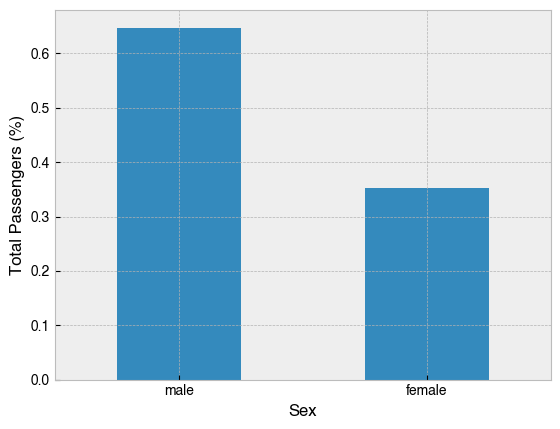

In [8]:
(
    df.Sex.value_counts(normalize=True)
    .plot(kind='bar', xlabel='Sex', ylabel='Total Passengers (%)', rot=0)
);  # rot=0 stops the 'male' and 'female' labels being displayed as horizontal text

### **8.** What were the names of the oldest and youngest passengers?

In [9]:
oldest_youngest = [df.Age.min(), df.Age.max()]
df.loc[df.Age.isin(oldest_youngest)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


### **9.** How many of the 5 oldest female passengers traveled first class?

In [10]:
# All but one
five_oldest_females = (
    df.loc[df.Sex=='female']
    .sort_values('Age', ascending=False)
    .iloc[0:5]
)
five_oldest_females

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S


In [11]:
# To get the values... 4 travelled 1st class, 1 travelled third class
five_oldest_females.Pclass.value_counts()

1    4
3    1
Name: Pclass, dtype: int64

### **10.** How many passengers embarked at Southampton?

In [12]:
# 644
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### **11.** Who paid the most for their ticket?

In [13]:
df.loc[df.Fare==df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [14]:
# Just get the names
df.loc[df.Fare==df.Fare.max()].Name

PassengerID
259                      Ward, Miss. Anna
680    Cardeza, Mr. Thomas Drake Martinez
738                Lesurer, Mr. Gustave J
Name: Name, dtype: object

### **12.** Of the top ten passengers who ***paid the most*** for their ticket, how many survived?

In [15]:
# 7 out of 10
# Get the top 10 who paid the most
df.sort_values('Fare', ascending=False).iloc[0:10]  # ascending=False

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [16]:
# Just get the number who survived by summing the Survived column
df.sort_values('Fare', ascending=False).iloc[0:10].Survived.sum()

7

### **13.** Of the top ten passengers who ***paid the least*** for their ticket, how many survived?

In [17]:
# Only 1
df.sort_values('Fare', ascending=True).iloc[0:10]  # Now ascending=True

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S


In [18]:
df.sort_values('Fare', ascending=True).head(10).Survived.sum()

1

### **14.** Of all surviving passengers, how many were male and how many were female?

In [19]:
df.loc[df.Survived==1, 'Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

### **15.** Make a boxplot describing the age distribution for males and females, showing the mean age as well as the median.

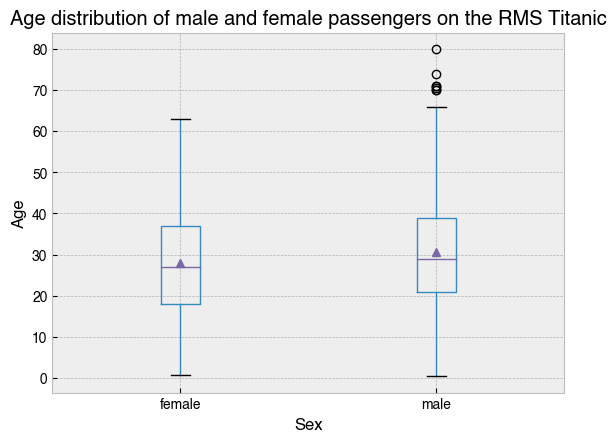

In [20]:
title = 'Age distribution of male and female passengers on the RMS Titanic'
ax = df.boxplot(column='Age', by='Sex', showmeans=True, ylabel='Age');
ax.set_title(title);  # Apply sensible title to the axes
ax.get_figure().suptitle('');  # Get read of the default figure title

### **16.** Get the information for all passengers with 'Frank' in their name

In [21]:
df.loc[df.Name.str.contains('Frank')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerID,,,,,,,,,,,
94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.575,NaN,S
166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.525,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.000,NaN,S
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.750,NaN,Q
329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S
367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.250,D37,C
549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.525,NaN,S


### **17.** What was the surname of the largest family on board the Titanic?

In [22]:
# Create a new column that is the sum of Parch and SibSp (refer back to the data key)
# and then sort the DataFrame by this column to see which surname appears at the top. 
# The Sage family looks to have been the largest, although some family members
# appear not be included in the dataset. 
df['RelsAboard'] = df.SibSp + df.Parch
df.sort_values('RelsAboard', ascending=False).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelsAboard
PassengerID,,,,,,,,,,,,
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,10
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,10
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S,7
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S,7


[Read about the Sage family in the Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-victim/john-george-sage.html)

### **18.** What was the name, sex and age of the youngest passenger to embark at Cherbourg? 

In [23]:
# Select and sort the Cherbourg embarkees by age
df.loc[df.Embarked=='C'].sort_values('Age', ascending=True).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelsAboard
PassengerID,,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,1
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,3
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,2
382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C,2


In [24]:
# Just get the relevant information
df.loc[df.Embarked=='C'].sort_values('Age', ascending=True).iloc[0].loc[['Name', 'Sex', 'Age']]

Name    Thomas, Master. Assad Alexander
Sex                                male
Age                                0.42
Name: 804, dtype: object

### **19.** Who stayed in cabin `D56`? Can you find out anything interesting about this person on the [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/)?

In [25]:
# Beesley, Mr. Lawrence
df.loc[df.Cabin=='D56']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelsAboard
PassengerID,,,,,,,,,,,,
22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S,0


### **20.** There was a Countess aboard the Titanic. What information can you find about her?

In [26]:
df[df.Name.str.contains('Countess')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelsAboard
PassengerID,,,,,,,,,,,,
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,0


[Read about the Countess in the Encyclopedia Titanica](https://www.encyclopedia-titanica.org/titanic-survivor/countess-of-rothes.html)

### **21.** Make two new columns containing the first and last name for each passenger.

In [27]:
df['FirstName'] = df.Name.str.split(',').str.get(1)
df['LastName'] = df.Name.str.split(',').str.get(0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,RelsAboard,FirstName,LastName
PassengerID,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr. Owen Harris,Braund
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs. John Bradley (Florence Briggs Thayer),Cumings
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss. Laina,Heikkinen
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs. Jacques Heath (Lily May Peel),Futrelle
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr. William Henry,Allen


### **22.** Make a bar chart showing the proportion of males and females who survived in each class

<AxesSubplot:xlabel='Pclass,Sex', ylabel='Proportion of survivors'>

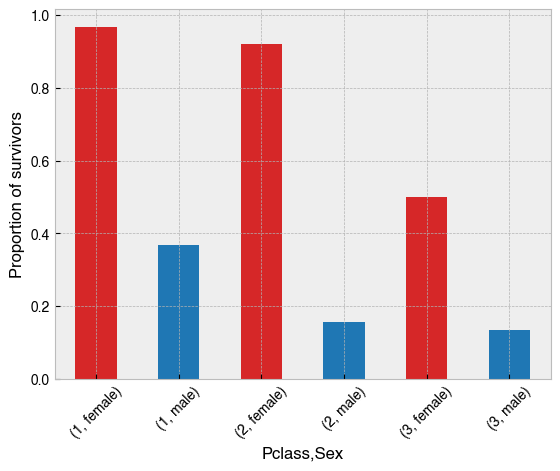

In [28]:
colors = ['tab:red', 'tab:blue']
(
    df.groupby(['Pclass', 'Sex'])
    .Survived
    .mean()
    .plot(kind='bar', color=colors, ylabel='Proportion of survivors', rot=45)
);